In [2]:
import os
import re
import json
from pprint import pprint
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

import utils

root_dir_walk = os.walk('..')

experiments = {}

for dirpath, dirnames, filenames in root_dir_walk:
    if (e := re.search('\.\./([0-9]+)', dirpath)) is not None:
        experiment_number = int(e.group(1))
        if 1 <= experiment_number <= 22:
            data = {}

            for fname in filenames:
                fpath = os.path.join(dirpath, fname)
                if re.search('experiment-[0-9]+-summary\.csv', fname) is not None:
                    data['summary_fname'] = fname 
                    data['summary_path'] = fpath
                    #data['summary'] = pd.read_csv(fpath, index_col=0)
                if re.search('config_[0-9]+\.json', fname) is not None:
                    data['config_fname'] = fname 
                    with open(fpath, 'r') as f:
                        data['config'] = json.load(f)
            if data != {}:
                experiments[experiment_number] = data

df = pd.concat([pd.read_csv(experiments[i]['summary_path']) for i in experiments]).reset_index(drop=True)
df.head()

,ligand,km,vmax,rsq,column_num,protein_concentration,a420_max,auc_mean,auc_cv,std_405,...,shaking_seconds,BSA,protein_conc,protein_vol,Unnamed: 0,ligand_dispensing,bulk_dispensing,protein_volume,experiments,column
0,NaN,1.538950,0.012510,0.021696,1.0,4.01,0.093,8.606125,0.575958,0.008799,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arachadionic Acid,285.406633,0.079279,-2.393192,2.0,4.01,0.080,10.597500,0.443524,0.012873,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arachadionic Acid,337.546311,0.083692,-2.341006,3.0,4.01,0.083,8.540825,0.461805,0.005500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arachadionic Acid,261.523179,0.082059,-2.433887,4.0,4.01,0.082,8.798688,0.503424,0.005182,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arachadionic Acid,265.911556,0.077865,-2.452384,5.0,4.01,0.081,8.220812,0.391866,0.005153,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


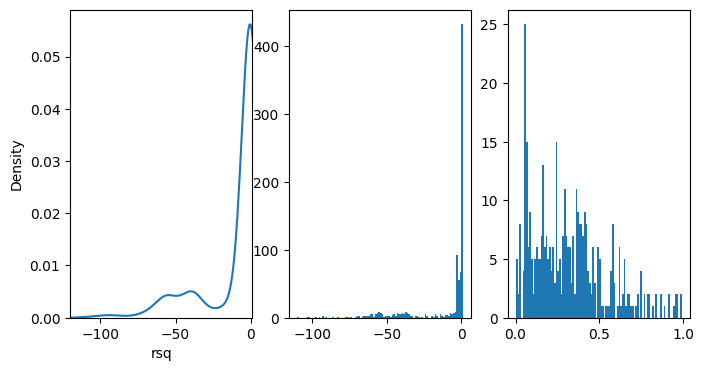

In [15]:
import seaborn as sns

fig, axs = plt.subplots(1, 3, figsize=(8,4))
sns.kdeplot(df['rsq'], ax=axs[0])
axs[0].set_xlim(-120, 1)
axs[1].hist(df['rsq'], bins=100)
axs[2].hist(df.loc[df['rsq'] > 0, 'rsq'], bins=100)
plt.show()